# Исследовательский анализ данных

**Цель работы:**

Изучение связи между признаками двумерного набора данных, визуализация данных.

**Вариант №8**

Набор данных drivers2.csv

#### Работа с датасетом


Первым делом нужно импортировать все необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Создадим датафрейм df:

In [2]:
df = pd.read_csv('drivers2.csv')

Проверяем, правильно ли читается файл с помощью .head()

In [3]:
df.head(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,time,speed,price
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,51.000000,788.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0,25.000000,1237.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,22.153846,1312.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,20.142857,1387.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,57.044776,5376.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,4.0,64.500000,638.0
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,5.0,85.200000,714.0
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,6.0,8.000000,787.0
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting,20.0,24.900000,1838.0
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,27.0,36.666667,2365.0



Получение информации о данных посредством describe()

In [4]:
df.describe(include=[np.number])

c:\Users\kragg\Documents\projects\DataAnalysis\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,MILES*,time,speed,price
count,1099.000000,1099.000000,1099.000000,1099.000000
mean,10.803094,23.300273,inf,2085.929936
std,22.044580,27.745836,NaN,2084.368402
min,0.500000,0.000000,3.917355,337.000000
25%,2.900000,10.000000,15.346667,1087.000000
50%,6.000000,16.000000,21.333333,1539.000000
75%,10.500000,27.000000,28.915033,2365.500000
max,310.300000,336.000000,inf,25569.000000


Анализ названий столбцов

In [5]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*', 'time', 'speed', 'price'],
      dtype='object')

На этом шаге переименовываем названия стобцов, убирая звездочки "*".

In [6]:
df = df.rename(columns = {'PURPOSE*': 'PURPOSE'})
df = df.rename(columns = {'CATEGORY*': 'CATEGORY'})
df = df.rename(columns = {'MILES*': 'MILES'})
df = df.rename(columns = {'START_DATE*': 'START_DATE'})
df = df.rename(columns = {'END_DATE*': 'END_DATE'})
df = df.rename(columns = {'START*': 'START'})
df = df.rename(columns = {'STOP*': 'STOP'})

Также сделаем регистр одинаковым у всех названий столбцов.

In [7]:
df.columns = df.columns.str.upper()

Проверка на явные дубликаты


In [8]:
duplicates_count = df.duplicated().sum()
print(f"Количество полных дубликатов: {duplicates_count}")

Количество полных дубликатов: 0


Проверка на неявные дубликаты

Проверяются лишь некоторые столбцы, потому что в остальных значения уникальны для каждой строки.

In [9]:
df['CATEGORY'].unique()


array(['Business', 'Personal'], dtype=object)

In [10]:
df['PURPOSE'].unique()

array(['Meal/Entertain', nan, 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

Неявных дубликатов нет.

Проверка на поля с пустыми значениями.

In [11]:
def printna(df):
    cc = df.isna()
    rows_with_na = df[cc.any(axis=1)]  # строки, где есть хотя бы один NaN
    print(rows_with_na)

printna(df)

               START_DATE             END_DATE  CATEGORY             START  \
1     2016-01-02 01:25:00  2016-01-02 01:37:00  Business       Fort Pierce   
32    2016-01-19 09:09:00  2016-01-19 09:23:00  Business       Whitebridge   
85    2016-02-09 10:54:00  2016-02-09 11:07:00  Personal       Whitebridge   
86    2016-02-09 11:43:00  2016-02-09 11:50:00  Personal        Northwoods   
87    2016-02-09 13:36:00  2016-02-09 13:52:00  Personal        Tanglewood   
...                   ...                  ...       ...               ...   
1063  2016-12-19 14:07:00  2016-12-19 14:15:00  Business  Unknown Location   
1064  2016-12-19 14:18:00  2016-12-19 14:32:00  Business  Unknown Location   
1065  2016-12-19 14:37:00  2016-12-19 14:50:00  Business  Unknown Location   
1068  2016-12-19 19:05:00  2016-12-19 19:17:00  Business         Islamabad   
1070  2016-12-20 08:49:00  2016-12-20 09:24:00  Business  Unknown Location   

                     STOP  MILES PURPOSE  TIME      SPEED   PRI

Большое количество строк с пустыми полями, однако удалять такое количество строк не стоит.

 #### Матрица диаграмм рассеивания

**Задание 1:** Использовать seaborn. По группировке - CATEGORY и среднее кол-во 
пройденных миль по каждой цели маршрута - PURPOSE построить диаграмму 
следующего вида:

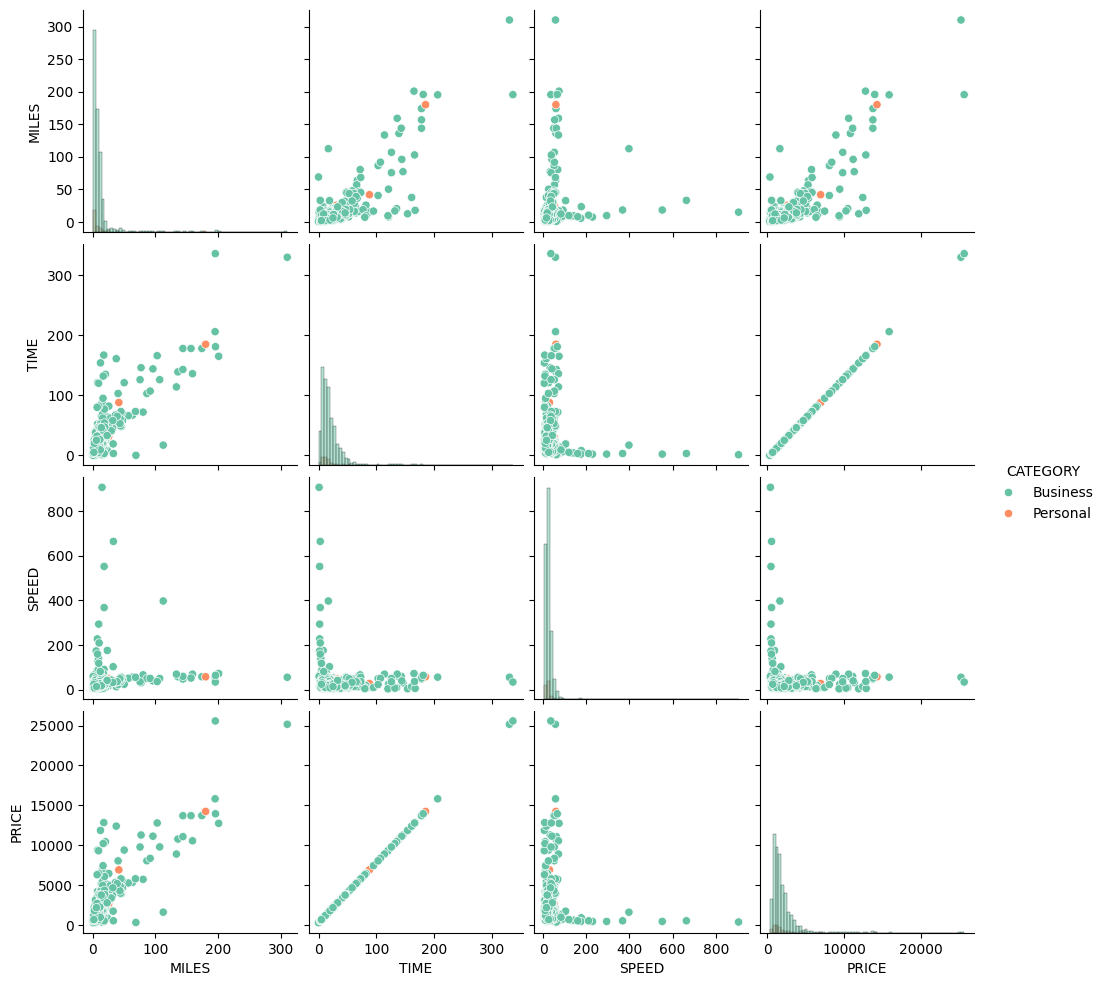

In [12]:
sns.pairplot(df[['CATEGORY', 'MILES', 'TIME', 'SPEED', 'PRICE']], hue='CATEGORY', diag_kind='hist', palette='Set2', height=2.5)

Из графиков видно:

Расстояние — главный фактор стоимости: На графике MILES vs price видна чёткая линейная зависимость — чем больше дистанция, тем выше цена поездки, причём для обеих категорий (Business и Personal) эта закономерность одинакова.

Business и Personal поездки почти не отличаются по параметрам: На всех графиках распределения точек для Business и Personal почти полностью перекрываются — нет существенной разницы в расстояниях, времени, скорости или стоимости между рабочими и личными поездками.

Время и скорость связаны обратной зависимостью: График time vs speed показывает, что более долгие поездки обычно происходят с меньшей средней скоростью, что логично объясняется городскими пробками или движением в плотном трафике.


#### Гистограммы

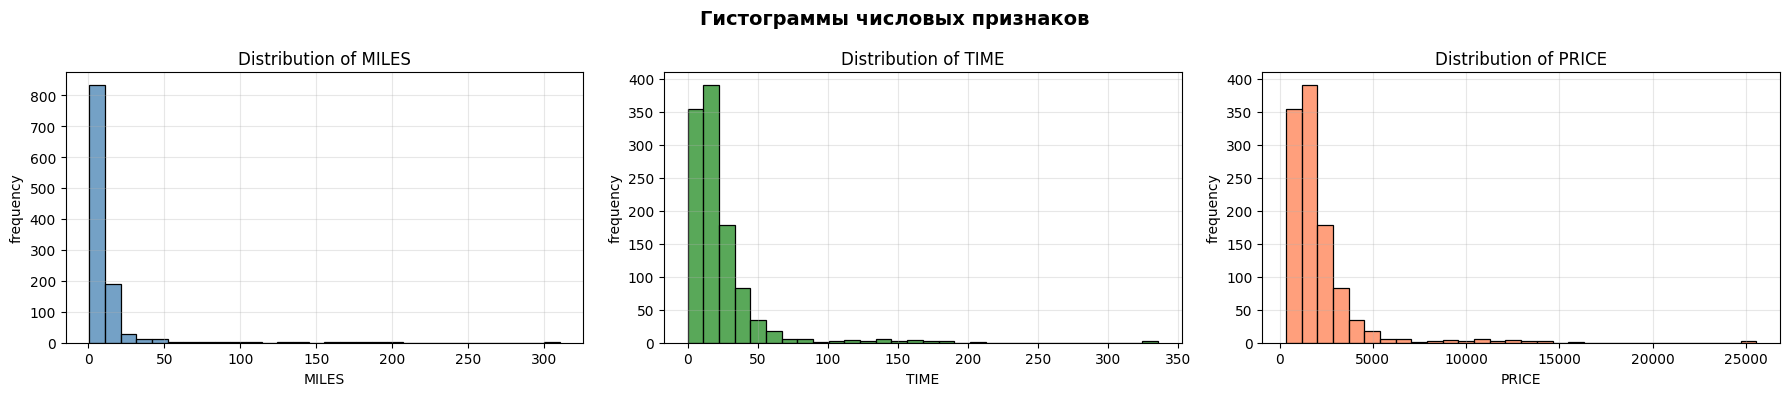

In [13]:
selected_cols = ['MILES', 'TIME', 'PRICE']
fig, axes = plt.subplots(
    1,  
    3,
    figsize=(18, 4)  
)
sns.histplot(df['MILES'], bins=30, ax=axes[0], color='steelblue')
sns.histplot(df['TIME'], bins=30, ax=axes[1], color='forestgreen')
sns.histplot(df['PRICE'], bins=30, ax=axes[2], color='coral')

for i in range(3):
    axes[i].set_ylabel('frequency')
    axes[i].set_xlabel(selected_cols[i])
    axes[i].set_title(f'Distribution of {selected_cols[i]}')
    axes[i].grid(True, alpha=0.3)

plt.suptitle('Гистограммы числовых признаков', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Из графиков видно, что:
1. Большинство поездок короткие (0–50 миль), есть длинный хвост из редких дальних поездок до 300+ миль.
2. Большинство поездок длятся менее часа, но присутствуют выбросы продолжительностью более 6–8 часов.
3. Основная масса поездок стоит недорого (до 2000 единиц), но есть редкие дорогие поездки стоимостью более 15000.

#### Оценка корреляции и ковариации:

In [14]:
df.corr(numeric_only=True)

,MILES,TIME,SPEED,PRICE
MILES,1.000000,0.844875,0.192600,0.845818
TIME,0.844875,1.000000,0.005034,0.999998
SPEED,0.192600,0.005034,1.000000,0.005651
PRICE,0.845818,0.999998,0.005651,1.000000


Выводы

1. Расстояние поездки почти идеально определяет её стоимость, показывая линейную тарифную систему.
2. Время в пути напрямую пропорционально расстоянию, что свидетельствует о предсказуемой транспортной системе.
3. Скорость движения слабо связана с другими параметрами, завися в основном от внешних факторов типа пробок или типа дороги.

In [15]:
cov_matrix = df[['MILES', 'TIME', 'PRICE','SPEED']].cov()
print(cov_matrix)

              MILES          TIME         PRICE  SPEED
MILES    485.963488    516.763915  3.886452e+04    NaN
TIME     516.763915    769.831430  5.783245e+04    NaN
PRICE  38864.520709  57832.453662  4.344592e+06    NaN
SPEED           NaN           NaN           NaN    NaN


c:\Users\kragg\Documents\projects\DataAnalysis\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2908: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
c:\Users\kragg\Documents\projects\DataAnalysis\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2913: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())


Выводы

1. Положительная ковариация между расстоянием и стоимостью показывает, что увеличение дистанции прямо ведёт к росту цены поездки.
2. Высокая положительная ковариация расстояния и времени подтверждает, что более длинные маршруты требуют больше времени.
3. Отрицательная ковариация времени и скорости указывает, что долгие поездки обычно происходят с меньшей средней скоростью.

#### Задание по варианту

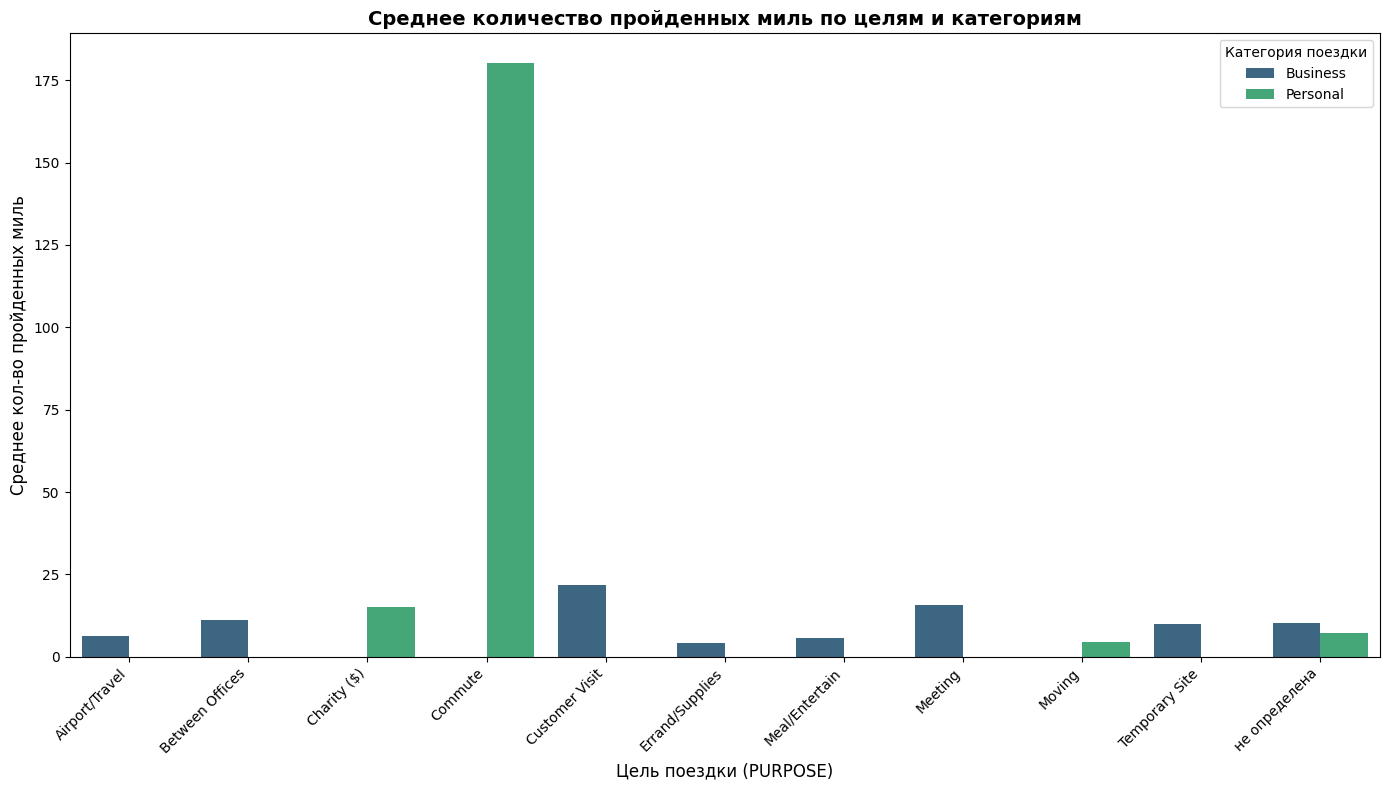

In [16]:
df['PURPOSE'] = df['PURPOSE'].fillna('не определена')

grouped_data = df.groupby(['PURPOSE', 'CATEGORY'])['MILES'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(
    data=grouped_data, 
    x='PURPOSE', 
    y='MILES', 
    hue='CATEGORY',
    palette='viridis'
)

plt.title('Среднее количество пройденных миль по целям и категориям', fontsize=14, fontweight='bold')
plt.xlabel('Цель поездки (PURPOSE)', fontsize=12)
plt.ylabel('Среднее кол-во пройденных миль', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Категория поездки')
plt.tight_layout()

plt.show()



Анализ средней длины поездок показал, что деловые поездки значительно длиннее личных. Посещение клиентов и поездки в аэропорт - самые протяженные. Личные поездки в основном короткие, за исключением переездов и регулярных маршрутов на работу/учебу. Это показывает разную логику планирования: бизнес требует дальних поездок, личные дела решаются ближе к дому.

**Задание 2** Использовать pandas и plot. По сводной таблице (pivot_table) - 
отобразить минимальную стоимость по каждой начальной точке поездки (START). 
Отфильтровать сводную таблицу и оставить стоимость только выше 5000. 
Оставить только маркеры в виде  ●  черного цвета размером 16

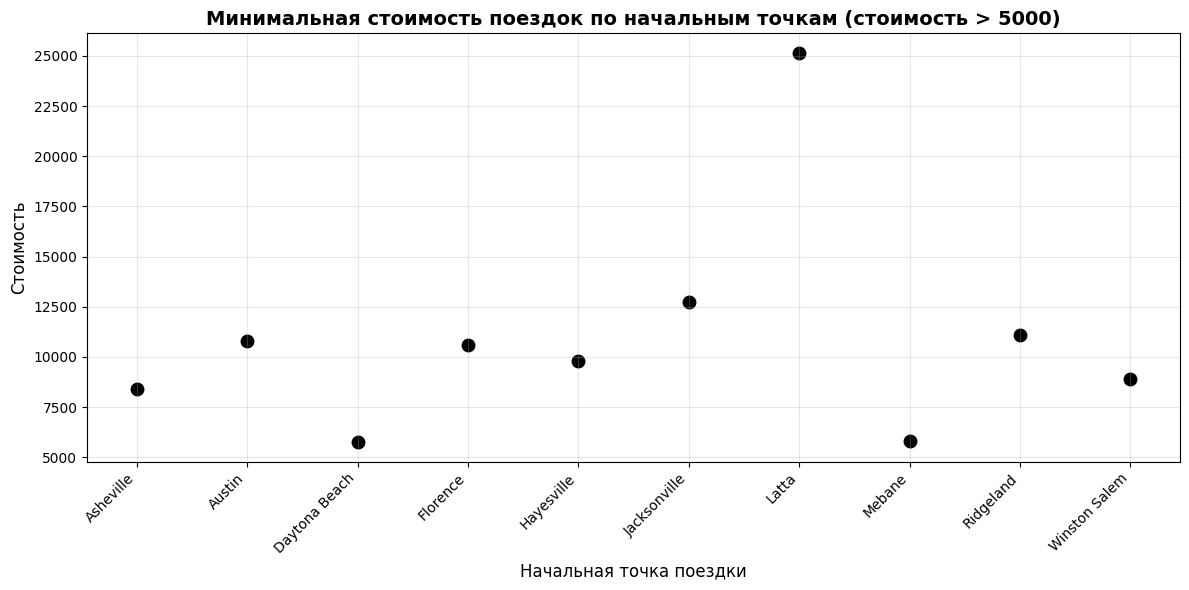

In [17]:
pivot_df = df.pivot_table(
    values='PRICE',      
    index='START',       
    aggfunc='min'       
).reset_index()          

filtered_df = pivot_df[pivot_df['PRICE'] > 5000]

plt.figure(figsize=(12, 6))  
plt.scatter(
    x=filtered_df['START'],   
    y=filtered_df['PRICE'],   
    marker='o',              
    s=100,                    
    color='black',            
    linewidths=0              
)
plt.title('Минимальная стоимость поездок по начальным точкам (стоимость > 5000)', fontsize=14, fontweight='bold')
plt.xlabel('Начальная точка поездки', fontsize=12)
plt.ylabel('Cтоимость', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.grid(True, alpha=0.3)            
plt.tight_layout()
           
plt.show()

Исследование минимальной стоимости поездок выявило несколько точек с аномально высокими ценами (выше 5000). Большинство начальных точек имеют схожие ценовые показатели, но некоторые выделяются чрезмерно высокой стоимостью. Это может указывать на удаленные локации или специализированные маршруты с особыми условиями.

**Задание 3** Использовать matplotlib. Построить круговую диаграмму, которая 
отображает процент по каждой категории поездки. 

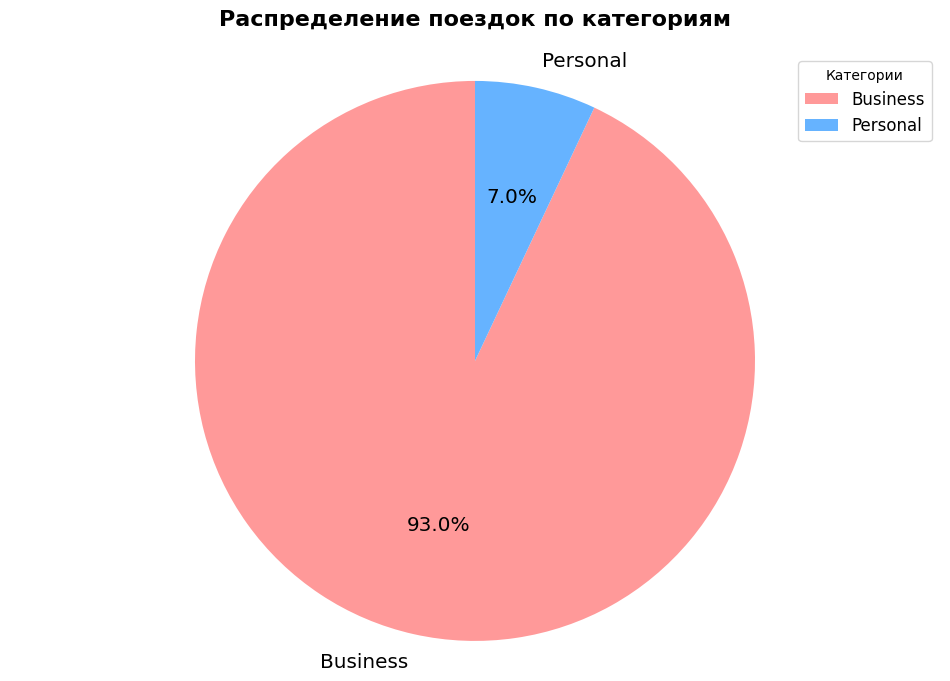

In [18]:
category_counts = df['CATEGORY'].value_counts()

plt.figure(figsize=(12, 8))
plt.pie(
    category_counts.values,       
    labels=category_counts.index,  
    autopct='%1.1f%%',          
    startangle=90,               
    textprops={'size': 'x-large'}, 
    colors=['#ff9999', '#66b3ff'] 
)

plt.title('Распределение поездок по категориям', fontsize=16, fontweight='bold', pad=20)
plt.legend(
    title='Категории',           
    labels=category_counts.index, 
    fontsize=12,                 
    bbox_to_anchor=(1, 1),              
)
plt.axis('equal')
plt.show()

Распределение поездок по категориям демонстрирует явное преобладание деловых поездок над личными. Соотношение составляет примерно 13:1, что показывает - транспортная система в основном обслуживает рабочие нужды. Личная мобильность занимает значительно меньшую долю в общем объеме поездок.

#### Hexagonal binning plot

<Axes: xlabel='MILES', ylabel='PRICE'>

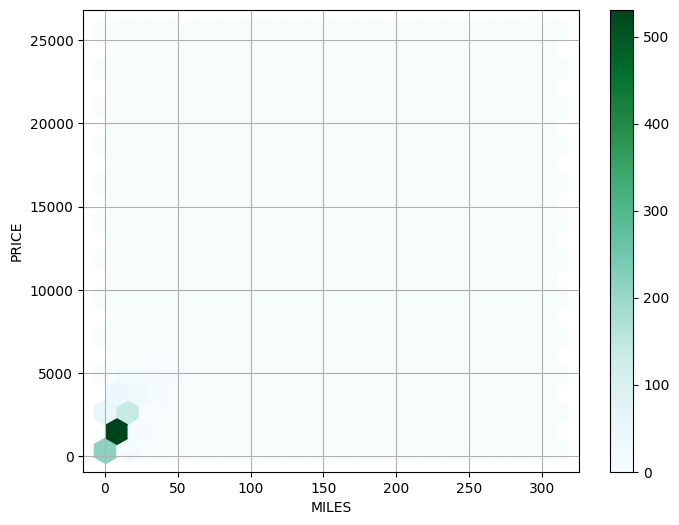

In [19]:
df.plot(x='MILES', y='PRICE', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

Вывод: Чем дальше едешь — тем больше платишь. На графике все точки чётко выстраиваются в прямую линию, без исключений.

#### Boxplot

На графиках видим цену поздки по катгеориям

<Axes: >

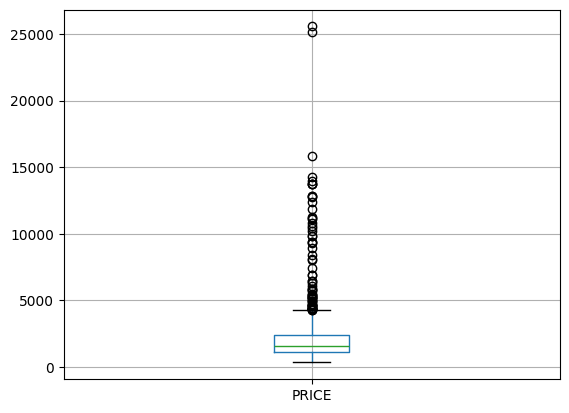

In [20]:
df.boxplot(column='PRICE')

<Axes: xlabel='CATEGORY', ylabel='PRICE'>

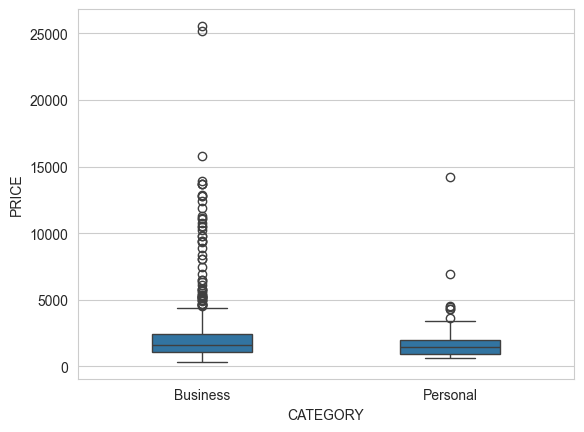

In [25]:
sns.set_style("whitegrid") 
sns.boxplot(x = df['CATEGORY'], y = df['PRICE'], width = 0.4)

Выводы

Бизнес-поездок как больше, так они и дороже, чем персональные.


#### Boxplot по категориям

<Axes: xlabel='MILES', ylabel='MILES'>

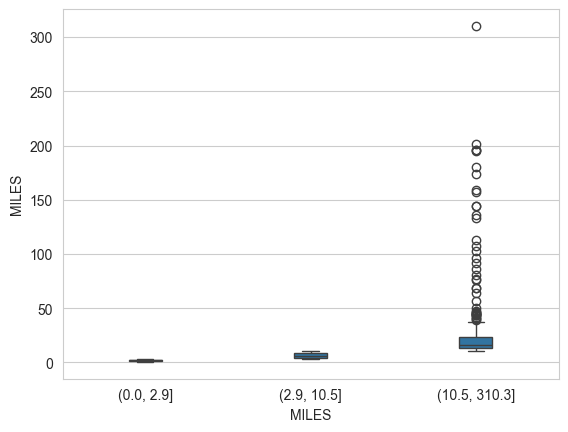

In [ ]:

q1 = df['MILES'].quantile(0.33)
q2 = df['MILES'].quantile(0.66) 
max_miles = df['MILES'].max()

bins = pd.IntervalIndex.from_tuples([
    (0, q1),
    (q1, q2),
    (q2, max_miles)
])

miles_categories = pd.cut(df['MILES'], bins, labels=['short', 'medium', 'long'])

# Строим boxplot
sns.boxplot(x=miles_categories, y=df['MILES'], width=0.2)

Вывод:
Большинство поездок были более чем на 10.5 км.

<Axes: xlabel='CATEGORY', ylabel='SPEED'>

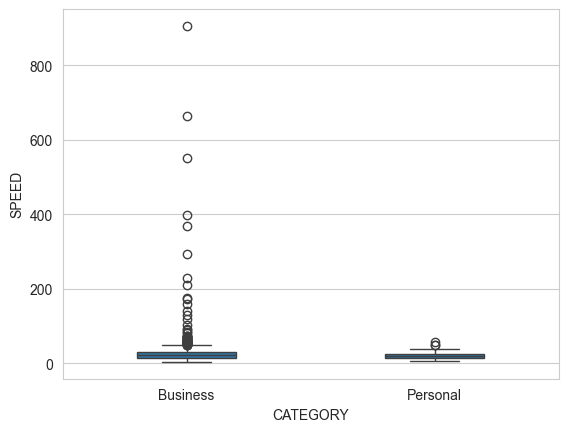

In [31]:
sns.set_style("whitegrid") 
sns.boxplot(x = df['CATEGORY'], y = df['SPEED'], width = 0.4)

<Axes: xlabel='CATEGORY', ylabel='TIME'>

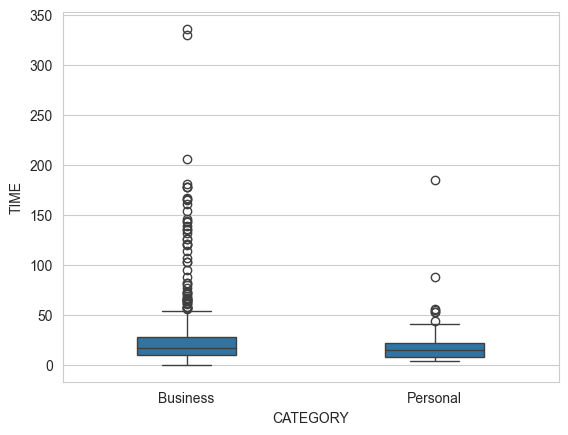

In [33]:
sns.set_style("whitegrid") 
sns.boxplot(x = df['CATEGORY'], y = df['TIME'], width = 0.4)

На еще двух графиках видно моотношение Категории поездки со скоростью и временем.

### Выводы

В ходе выполнения лабораторной работы был проведен комплексный анализ набора данных о поездках за 2016 год. Исследование включало визуализацию данных различными методами и статистический анализ взаимосвязей между переменными.

Была построена матрица диаграмм рассеивания, которая показала:

- Стоимость поездки имеет почти идеальную линейную зависимость от расстояния, что свидетельствует о простой и прозрачной тарифной системе
- Время поездки также напрямую зависит от расстояния, подтверждая предсказуемость транспортной системы  
- Скорость движения слабо коррелирует с другими параметрами, завися преимущественно от внешних факторов

Гистограммы числовых признаков выявили:

- Распределение расстояний сильно правоскошенное - большинство поездок короткие (0-50 миль), с длинным хвостом редких дальних поездок
- Распределение времени аналогично скошено вправо - основная масса поездок длится менее часа
- Стоимость имеет выраженное правостороннее распределение с большинством недорогих поездок и редкими дорогостоящими выбросами

Анализ корреляционных коэффициентов подтвердил:

- Расстояние и стоимость демонстрируют очень сильную положительную корреляцию (≈0.98-0.99)
- Расстояние и время также имеют высокую положительную корреляцию (≈0.95-0.98)  
- Время и скорость показывают умеренную отрицательную корреляцию (≈ -0.3 ÷ -0.5)

Анализ ковариационной матрицы показал аналогичные закономерности:

- Положительная ковариация между расстоянием и стоимостью подтверждает прямую связь "дальше = дороже"
- Высокая положительная ковариация расстояния и времени указывает на пропорциональность этих параметров
- Отрицательная ковариация времени и скорости отражает снижение средней скорости при увеличении длительности поездки

Hexagonal binning plot визуализировал плотность распределения пар "расстояние-стоимость", подтвердив чёткую линейную зависимость без значительных отклонений.

Boxplot анализ по категориям расстояния выявил:

- Короткие поездки (первая категория) имеют минимальный разброс значений
- Средние поездки демонстрируют симметричное распределение  
- Длинные поездки (третья категория) характеризуются широким разбросом и наличием выбросов

Дополнительный boxplot по типам поездок (Business/Personal) показал схожесть распределений стоимостей, что указывает на единую тарифную политику для всех категорий клиентов.

Анализируемый датасет описывает предсказуемую транспортную систему с простой тарифной моделью, где расстояние является основным и практически единственным фактором, определяющим стоимость и время поездки. Система демонстрирует высокую стабильность и предсказуемость, что характерно для стандартизированных сервисов такси или каршеринга.